<a href="https://colab.research.google.com/github/waelrash1/DL/blob/master/SiameseBERT_SemanticSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Embeddings using Siamese BERT-Networks
---
This Google Colab Notebook illustrates using the Sentence Transformer python library to quickly create BERT embeddings for sentences and perform fast semantic searches.

The Sentence Transformer library is available on [pypi](https://pypi.org/project/sentence-transformers/) and [github](https://github.com/UKPLab/sentence-transformers). The library implements code from the ACL 2019 paper entitled "[Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://www.aclweb.org/anthology/D19-1410.pdf)" by Nils Reimers and Iryna Gurevych.


## Install Sentence Transformer Library

In [1]:
# Install the library using pip
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 2.8 MB/s 
     |████████████████████████████████| 3.1 MB 9.8 MB/s 
     |████████████████████████████████| 3.3 MB 32.3 MB/s 
     |████████████████████████████████| 1.2 MB 21.2 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 38.3 MB/s 
     |████████████████████████████████| 596 kB 42.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=4c351fa6307e1476c9f1af9b154af6603aed0aec30637034930a1755b2a2cfdb
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Load the BERT Model

In [2]:
from sentence_transformers import SentenceTransformer


# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Setup a Corpus

In [3]:
# A corpus is a list with documents split by sentences.

sentences = ['Absence of sanity', 
             'Lack of saneness',
             'A man is eating food.',
             'A man is eating a piece of bread.',
             'The girl is carrying a baby.',
             'A man is riding a horse.',
             'A woman is playing violin.',
             'Two men pushed carts through the woods.',
             'A man is riding a white horse on an enclosed ground.',
             'A monkey is playing drums.',
             'A cheetah is running behind its prey.']

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 2.95402974e-01  2.91810900e-01  2.16480064e+00  2.20419139e-01
 -1.30860563e-02  1.01950336e+00  1.51298165e+00  2.34132320e-01
  2.73057997e-01  1.35122567e-01 -1.11313391e+00 -1.25885040e-01
  1.45378545e-01  9.77708459e-01  1.39352298e+00  4.57704633e-01
 -5.82130671e-01 -7.24940896e-01 -3.61733735e-01 -2.27515146e-01
  1.66631229e-02  2.04862073e-01  6.55132890e-01 -1.29376423e+00
 -7.26099789e-01 -1.91135794e-01 -3.07211697e-01 -1.30278611e+00
 -1.42963886e+00  5.67481527e-03  3.54811281e-01  4.83713090e-01
  6.65387869e-01  5.33848643e-01  6.40497029e-01  5.90408981e-01
  7.83851892e-02 -1.07759225e+00 -1.24677137e-01 -3.98406178e-01
  7.36314654e-01  5.28293908e-01  5.63290954e-01  4.14546669e-01
  4.49179500e-01 -9.58791003e-02  1.45424581e+00 -2.69144714e-01
 -2.44059682e-01 -1.10387063e+00 -2.00922728e-01 -2.17391783e-03
  1.83387911e+00  1.06518412e+00 -5.11946201e-01 -1.

In [8]:
query = 'Nobody has sane thoughts' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 3 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches =  5#@param {type: "number"}

print("Semantic Search Results")
i=0
for query, query_embedding in zip(queries, query_embeddings):
  i=i+1
  print(i+1)

Semantic Search Results
2


## Perform Semantic Search

In [10]:
import scipy
#@title Sematic Search Form

# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

query = 'Nobody has sane thoughts' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 3 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches =  3#@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results




Query: Nobody has sane thoughts

Top 5 most similar sentences in corpus:
Lack of saneness (Cosine Score: 0.8958)
Absence of sanity (Cosine Score: 0.8744)
A man is riding a horse. (Cosine Score: 0.1705)


In [1]:
import pandas as pd
import numpy as np



url_train='https://raw.githubusercontent.com/koushikkonwar/Few-Shot-/master/Dataset/final_fewshot_train.csv'
url_test='https://raw.githubusercontent.com/koushikkonwar/Few-Shot-/master/Dataset/final_fewshot_test.csv'
test = pd.read_csv(url_train)
train = pd.read_csv(url_test)

train=train[['text','class']]
test=test[['text','class']]

In [2]:
train.head()

,text,class
0,"ApiServer: Fix apidiscovery fail case, fix com...",1
1,[GSCOLLECT-1606] Improve primitive map perform...,5
2,Big rename and more pointcut features in UI,4
3,Network-refactor: fix bugs in components.xml d...,1
4,HADOOP-10659. Refactor AccessControlList to re...,5


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/4'
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.load(module_url)

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow_hub as hub
import keras
import keras.backend as K
from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *
from keras import Model
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers import Bidirectional, LSTM
import pickle    
import os
input_text1 = Input(shape=(512,))
x = Dense(256, activation='relu')(input_text1)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = Dropout(0.4)(x)
dense_layer = Dense(128, name='dense_layer')(x)
norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

model=Model(inputs=[input_text1], outputs=norm_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                             

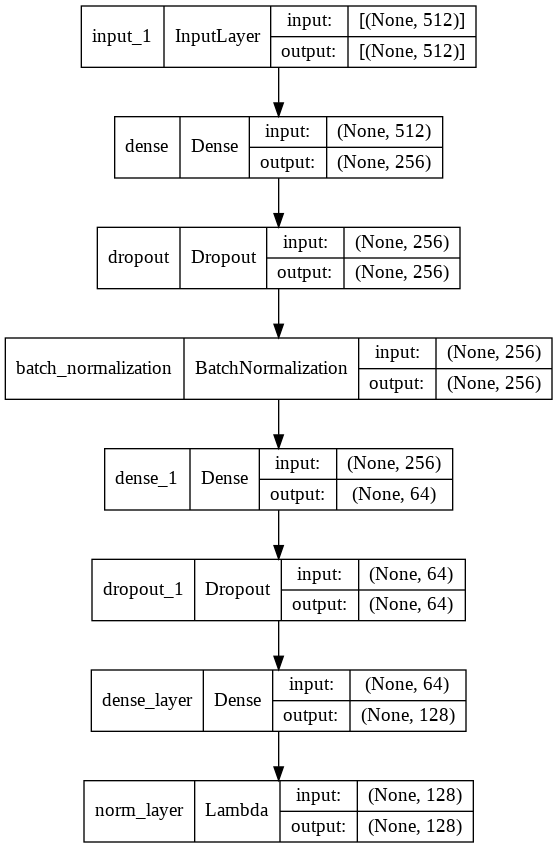

In [6]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(512,))
in_p = Input(shape=(512,))
in_n = Input(shape=(512,))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = model(in_a)
emb_p = model(in_p)
emb_n = model(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.4, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

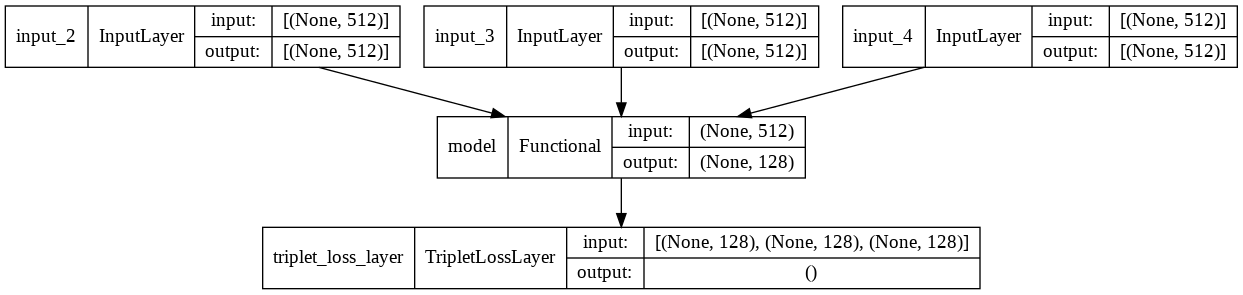

In [10]:
plot_model(nn4_small2_train, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
#creating the necessary datastructures for selcting triplets
unique_train_label=np.array(train['class'].unique().tolist())
labels_train=np.array(train['class'].tolist())
map_train_label_indices = {label: np.flatnonzero(labels_train == label) for label in unique_train_label}

def get_triplets(unique_train_label,map_train_label_indices):
      label_l, label_r = np.random.choice(unique_train_label, 2, replace=False)
      a, p = np.random.choice(map_train_label_indices[label_l],2, replace=False)
      n = np.random.choice(map_train_label_indices[label_r])
      return a, p, n

def get_triplets_batch(k,train_set,unique_train_label,map_train_label_indices,embed):

    while True:
      idxs_a, idxs_p, idxs_n = [], [], []
      for _ in range(k):
          a, p, n = get_triplets(unique_train_label,map_train_label_indices)
          idxs_a.append(a)
          idxs_p.append(p)
          idxs_n.append(n)

      a=train_set.iloc[idxs_a].values.tolist()
      b=train_set.iloc[idxs_p].values.tolist()
      c=train_set.iloc[idxs_n].values.tolist()

      a = embed(a)
      p = embed(b)
      n = embed(c)
        # return train_set[idxs_a], train_set[idxs_p], train_set[idxs_n]
      yield [a,p,n], []

In [14]:
map_train_label_indices

{1: array([   0,    3,    5, ..., 3268, 3272, 3274]),
 2: array([  39,   72,   84,  107,  154,  156,  178,  193,  201,  224,  228,
         254,  297,  303,  304,  309,  321,  336,  361,  384,  391,  395,
         460,  461,  465,  477,  487,  492,  494,  501,  503,  506,  511,
         514,  521,  563,  566,  567,  579,  585,  594,  601,  620,  625,
         635,  646,  647,  651,  675,  699,  718,  757,  777,  778,  793,
         815,  817,  822,  830,  858,  886,  887,  900,  903,  927,  945,
         966,  989, 1003, 1011, 1015, 1031, 1047, 1057, 1061, 1068, 1071,
        1077, 1100, 1103, 1110, 1114, 1119, 1122, 1167, 1183, 1195, 1197,
        1208, 1214, 1255, 1258, 1262, 1265, 1278, 1282, 1284, 1329, 1339,
        1349, 1357, 1358, 1360, 1366, 1379, 1421, 1451, 1468, 1472, 1473,
        1493, 1521, 1522, 1523, 1524, 1533, 1537, 1542, 1553, 1569, 1576,
        1641, 1645, 1656, 1664, 1680, 1685, 1686, 1690, 1693, 1727, 1729,
        1735, 1757, 1760, 1768, 1774, 1788, 1797, 1808,

In [ ]:
nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit(get_triplets_batch(128,train['text'],unique_train_label,map_train_label_indices,embed), epochs=100,steps_per_epoch=10)


Epoch 1/100
10/10 [==============================] - 6s 466ms/step - loss: 49.0304
Epoch 2/100
10/10 [==============================] - 5s 485ms/step - loss: 38.5986
Epoch 3/100
10/10 [==============================] - 5s 469ms/step - loss: 29.9608
Epoch 4/100
10/10 [==============================] - 5s 475ms/step - loss: 27.0973
Epoch 5/100
10/10 [==============================] - 5s 456ms/step - loss: 19.2303
Epoch 6/100
10/10 [==============================] - 5s 475ms/step - loss: 17.2754
Epoch 7/100
10/10 [==============================] - 5s 480ms/step - loss: 13.1837
Epoch 8/100
10/10 [==============================] - 5s 468ms/step - loss: 11.0166
Epoch 9/100
10/10 [==============================] - 5s 459ms/step - loss: 9.5057
Epoch 10/100
10/10 [==============================] - 4s 447ms/step - loss: 8.9889
Epoch 11/100
10/10 [==============================] - 5s 459ms/step - loss: 6.9021
Epoch 12/100
10/10 [==============================] - 5s 456ms/step - loss: 6.9472
Epoch

In [48]:
X_train_embed=embed(np.array(test['text'].values.tolist()))

print(X_train_embed['outputs'][1,:])
X_train = model.predict(X_train_embed['outputs'])
t2 = tf.constant([[0, 1, 2, 3, 4],
                  [5, 6, 7, 8, 9],
                  [10, 11, 12, 13, 14],
                  [15, 16, 17, 18, 19]])

t2
print(t2[1, :])

tf.Tensor(
[-1.07632568e-02  5.37427776e-02  5.57557121e-02 -4.29983363e-02
 -8.75580013e-02 -2.67664827e-02 -7.02331886e-02  7.22488835e-02
 -4.99313660e-02 -5.84762245e-02  1.09366663e-01 -1.29547166e-02
 -3.20483558e-02  4.80407551e-02 -4.41176146e-02  5.84856197e-02
 -1.68011170e-02  4.46876921e-02 -2.71524470e-02 -4.06926312e-02
 -2.71106865e-02 -5.64140156e-02 -4.01164703e-02 -3.66834551e-02
 -2.22960189e-02 -4.33362983e-02 -4.44441177e-02 -4.52906378e-02
  4.08616289e-02  2.79816017e-02 -3.82203190e-03  3.69736515e-02
  1.19979284e-03 -3.58112454e-02 -3.14759798e-02  4.57969904e-02
  1.88960712e-02  8.81707575e-03  6.24634959e-02  2.65883170e-02
 -1.10742645e-02  5.04621416e-02  8.58031400e-03  1.51149416e-02
  6.29509846e-03  5.13942214e-03  2.61461120e-02  5.61133847e-02
  3.84249277e-02 -1.81091819e-02  3.31447343e-03  3.43973711e-02
 -2.75901072e-02 -2.46237051e-02 -5.81642948e-02 -6.67020865e-03
 -1.89972743e-02 -4.83385101e-02  2.86639109e-02  3.52869146e-02
 -4.47732536e-

In [33]:
a=np.array([[1,2,3],[4,5,6],7,8,9])
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([list([1, 2, 3]), list([4, 5, 6]), 7, 8, 9], dtype=object)

In [56]:
#getting the embeddings from the model
X_train = model.predict(embed(np.array(train['text'].values.tolist()))['outputs'])
X_test = model.predict(embed(np.array(test['text'].values.tolist()))['outputs'])
#X_train = embed(np.array(train['text'].values.tolist())
#X_test = embed(np.array(test['text'].values.tolist()))
y_train = np.array(train['class'].values.tolist())
y_test = np.array(test['class'].values.tolist())

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

KNN accuracy = 0.95, SVM accuracy = 0.95
